<a href="https://colab.research.google.com/github/panchamdesai777/Hackathons/blob/master/Metal_Furnace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Metal Furnace Challenge : Hackathon**

---
![alt text](https://mk0analyticsindf35n9.kinstacdn.com/wp-content/uploads/2020/04/MetalFurnace-01-scaled.jpg)

###**Description:**

Manufacturing of any alloy is not a simple process. Many complicated factors are involved in the making of a perfect alloy, from the temperature at which various metals are melted to the presence of impurities to the cooling temperature set to cool down the alloy. Very minor changes in any of these factors can affect the quality or grade of the alloy produced.

### **About Dataset:**

You are provided with 28 anonymized factors (f0 to f27) that influence the making of a perfect alloy that is to be used for various applications based on the grade/quality of the obtained product.

### **Objective:**

Given are 28 distinguishing factors in the manufacturing of an alloy, your objective as a data scientist is to build a Machine Learning model that can predict the grade of the product using these factors.


In [0]:
#Importing Required Libraries
#_______________________________________________________________________________________________________________
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
#_______________________________________________________________________________________________________________
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#_______________________________________________________________________________________________________________
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score,f1_score
import itertools
from sklearn.model_selection import GridSearchCV, cross_val_score ,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
#Load Dataset from drive
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [19]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
df = pd.read_csv(io.BytesIO(uploaded['Train.csv']))
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.85,-0.26,-0.46,0.41,1.31,2.33,0.37,0.09,0.11,0.00,0.40,0.31,0.55,0.47,0.17,0.10,0.31,0.04,0.18,0.09,0.23,-1.08,0.44,-0.41,-0.69,0.27,3.73,0.10,2
1,-0.83,-0.26,3.03,-2.44,1.31,-0.28,0.37,0.09,0.11,0.00,0.40,0.31,0.55,0.47,0.17,0.10,0.31,0.04,0.18,0.09,0.23,-1.08,-0.23,-0.41,-0.69,0.27,-0.23,0.10,4
2,1.85,-0.26,-0.46,0.41,1.31,2.33,0.37,0.09,0.11,0.00,0.40,0.31,0.55,0.47,0.17,0.10,0.31,0.04,0.18,0.09,0.23,0.93,1.46,1.22,1.88,0.27,-0.23,0.10,2
3,0.51,-0.26,-0.46,0.41,-0.53,-0.28,0.37,0.09,0.11,0.00,0.40,0.31,-2.00,-2.12,0.17,0.10,-3.24,0.04,0.18,0.09,0.23,0.93,-0.01,-0.41,1.50,0.27,-0.23,0.10,2
4,-0.83,-0.26,-0.46,0.41,-0.53,-0.28,0.37,0.09,0.11,0.00,-2.53,0.31,-2.00,-2.12,0.17,0.10,0.31,0.04,0.18,0.09,0.23,0.93,-0.57,-1.16,1.88,0.27,-0.23,0.10,2


In [20]:
df.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'grade'],
      dtype='object')

(63, 28)

In [0]:
#Treat data imbalance
X=df.drop('grade',1)
y=df['grade']


In [22]:
#Check for feature importance for logistic Regression

model = LogisticRegression(multi_class='multinomial',random_state=9)

#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      0.19      0.26        21
           2       0.86      0.96      0.91       145
           3       1.00      0.92      0.96        12
           4       1.00      0.60      0.75         5

    accuracy                           0.84       186
   macro avg       0.65      0.53      0.57       186
weighted avg       0.81      0.84      0.82       186

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0.8894009216589862
0.8440860215053764


0.3488887708271072


Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27'],
      dtype='object')

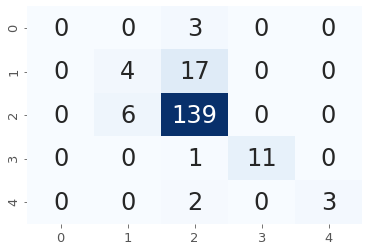

In [23]:
#Evaluation metric
class_report=classification_report(y_test,y_pred)
print(class_report)
print('--'*100)
#train score
train_score=model.score(X_train,y_train)
print(train_score)
#test score
test_score=model.score(X_test,y_test)
print(test_score)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#log loss
from sklearn.metrics import log_loss
LOG_LOSS=log_loss(y_test,model.predict_proba(X_test))
print(LOG_LOSS)
X_train.columns

In [24]:
#Log Loss For logistic
from sklearn.metrics import log_loss
LOG_LOSS=log_loss(y_test,model.predict_proba(X_test))
print(LOG_LOSS)


0.3488887708271072


# **Random Forest Classifier**


---



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=72, verbose=0,
                       warm_start=False)

Feature: 0, Score: 0.06766
Feature: 1, Score: 0.00892
Feature: 2, Score: 0.13927
Feature: 3, Score: 0.01866
Feature: 4, Score: 0.05839
Feature: 5, Score: 0.04051
Feature: 6, Score: 0.04241
Feature: 7, Score: 0.01024
Feature: 8, Score: 0.00560
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.01966
Feature: 11, Score: 0.00362
Feature: 12, Score: 0.01122
Feature: 13, Score: 0.00742
Feature: 14, Score: 0.08188
Feature: 15, Score: 0.01386
Feature: 16, Score: 0.01963
Feature: 17, Score: 0.00581
Feature: 18, Score: 0.06992
Feature: 19, Score: 0.00785
Feature: 20, Score: 0.00353
Feature: 21, Score: 0.01581
Feature: 22, Score: 0.17945
Feature: 23, Score: 0.11088
Feature: 24, Score: 0.04676
Feature: 25, Score: 0.00744
Feature: 26, Score: 0.00254
Feature: 27, Score: 0.00103


<BarContainer object of 28 artists>

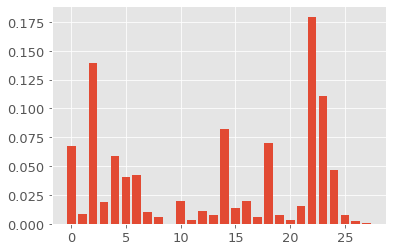

In [25]:
#Treat data imbalance
from matplotlib import pyplot
X=df.drop('grade',1)
y=df['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
rf_model=RandomForestClassifier(random_state=72)
rf_model.fit(X_train, y_train)
y_pred_1=rf_model.predict(X_test)
importance=rf_model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.90      0.86      0.88        21
           2       0.96      0.98      0.97       145
           3       1.00      0.92      0.96        12
           4       0.71      1.00      0.83         5

    accuracy                           0.95       186
   macro avg       0.71      0.75      0.73       186
weighted avg       0.93      0.95      0.94       186

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0.9953917050691244
0.946236559139785


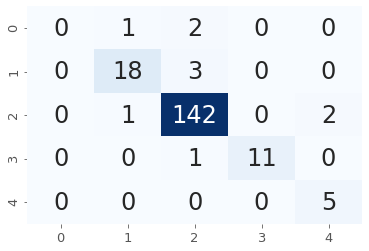

In [26]:
#Evaluation metric
class_report=classification_report(y_test,y_pred_1)
print(class_report)
print('--'*100)
#train score
train_score=rf_model.score(X_train,y_train)
print(train_score)
#test score
test_score=rf_model.score(X_test,y_test)
print(test_score)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_1)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [27]:
from sklearn.metrics import log_loss
LOG_LOSS=log_loss(y_test,rf_model.predict_proba(X_test))
print(LOG_LOSS)
X_train.columns

0.33862036341778484


Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27'],
      dtype='object')

# **XGBOOST CLASSIFIER**

---



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=72,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.90      0.90      0.90        21
           2       0.97      0.98      0.97       145
           3       1.00      0.92      0.96        12
           4       0.71      1.00      0.83         5

    accuracy                           0.95       186
   macro avg       0.72      0.76      0.73       186
weighted avg       0.94      0.95      0.94       186

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0.9815668202764977
0.9516129032258065


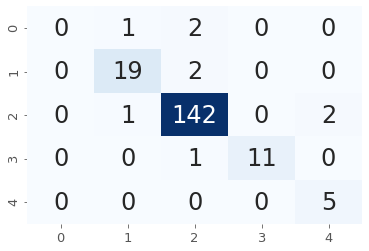

In [28]:


X=df.drop('grade',1)
y=df['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
xgb_clf =XGBClassifier(random_state=72)
xgb_clf.fit(X_train, y_train)
y_pred_4=xgb_clf.predict(X_test)
#Evaluation metric
class_report=classification_report(y_test,y_pred_4)
print(class_report)
print('--'*100)
#train score
train_score=xgb_clf.score(X_train,y_train)
print(train_score)
#test score
test_score=xgb_clf.score(X_test,y_test)
print(test_score)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test,y_pred_4)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [29]:
from sklearn.metrics import log_loss
LOG_LOSS=log_loss(y_test,xgb_clf.predict_proba(X_test))
print(LOG_LOSS)


0.196495126507255


## **Test Data**

---



In [30]:
#Load The test Data
#Load Dataset from drive
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test.csv


In [31]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
test_df = pd.read_csv(io.BytesIO(uploaded['Test.csv']))
test_df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,-0.84,-0.27,1.28,0.46,-0.59,-0.24,0.35,0.12,0.17,0.06,0.45,0.28,-2.14,-2.53,0.18,0.06,0.29,0.06,0.20,0.06,0.28,0.89,-0.57,1.10,-0.24,0.23,-0.22,0.09
1,2.08,-0.27,-0.50,0.46,-2.44,-0.24,0.35,0.12,0.17,0.06,0.45,0.28,0.51,0.40,0.18,0.06,0.29,0.06,-5.06,0.06,0.28,0.89,0.50,-0.43,-0.24,0.23,-0.22,0.09
2,-0.84,-0.27,1.28,0.46,-0.59,-0.24,0.35,0.12,0.17,0.06,0.45,0.28,0.51,0.40,0.18,0.06,0.29,0.06,0.20,0.06,0.28,-1.13,-0.57,-0.43,-0.66,0.23,-0.22,0.09
3,-0.84,-0.27,-0.50,0.46,1.27,-0.24,-2.86,0.12,0.17,0.06,0.45,0.28,0.51,0.40,0.18,0.06,0.29,0.06,-5.06,0.06,0.28,-1.13,-0.45,-1.92,-0.66,0.23,-0.22,0.09
4,-0.84,-0.27,-0.50,0.46,-0.59,-0.24,-2.86,0.12,0.17,0.06,0.45,0.28,0.51,0.40,0.18,0.06,0.29,0.06,0.20,0.06,0.28,-1.13,-0.57,-0.43,-0.66,0.23,-0.22,0.09


In [0]:
A=xgb_clf.predict_proba(test_df)


In [33]:
A=pd.DataFrame(A)
A

,0,1,2,3,4
0,0.00,0.00,1.00,0.00,0.00
1,0.00,0.34,0.04,0.63,0.00
2,0.00,0.00,1.00,0.00,0.00
3,0.00,0.00,0.06,0.93,0.00
4,0.00,0.00,0.99,0.01,0.00
...,...,...,...,...,...
261,0.00,0.01,0.98,0.00,0.00
262,0.00,0.01,0.98,0.00,0.01
263,0.00,0.68,0.32,0.00,0.00
264,0.00,0.48,0.51,0.00,0.01


In [0]:

A.to_excel('xgb_submission.xlsx')

In [0]:
from google.colab import files
files.download('xgb_submission.xlsx')